## Exploring Q-Q and P-P plots

This notebook is for getting a better understanding of the difference between Q-Q and P-P plots.

In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [4]:
data = stats.norm(3, 4).rvs(50)

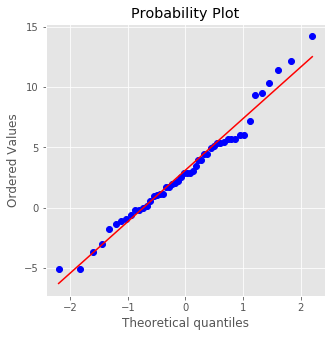

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
stats.probplot(data, plot=ax);

Note they are equally spaced along the horizontal axis.

Let's write a function for Q-Q plots. First, assume they have the same number of points.

In [6]:
def qqplot(ax, data1, data2, s=10, alpha=0.3):
    data1 = sorted(data1)
    data2 = sorted(data2)
    ax.scatter(data1, data2, s=s, alpha=alpha)
    ax.set_title('Q-Q Plot')

We'll use a non-normal distribution.

In [7]:
data1 = stats.expon(0, 2).rvs(100)
data2 = stats.expon(0, 3).rvs(100)

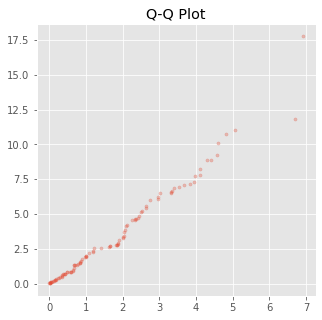

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
qqplot(ax, data1, data2)

## P-P plots

P-P plots are parameterized by position, and plot one quantile against the other.

Q-Q plots are parameterized by quantile, and plot one position against the other.

In [9]:
def ppplot(ax, data1, data2, s=10, alpha=0.3):
    combined = np.sort(np.concatenate([data1, data2]))[:, None]

    # would be better if it split the difference between < and <=
    ax.scatter((data1 < combined).mean(axis=1),
               (data2 < combined).mean(axis=1), 
               s=s, alpha=alpha)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title('P-P Plot')

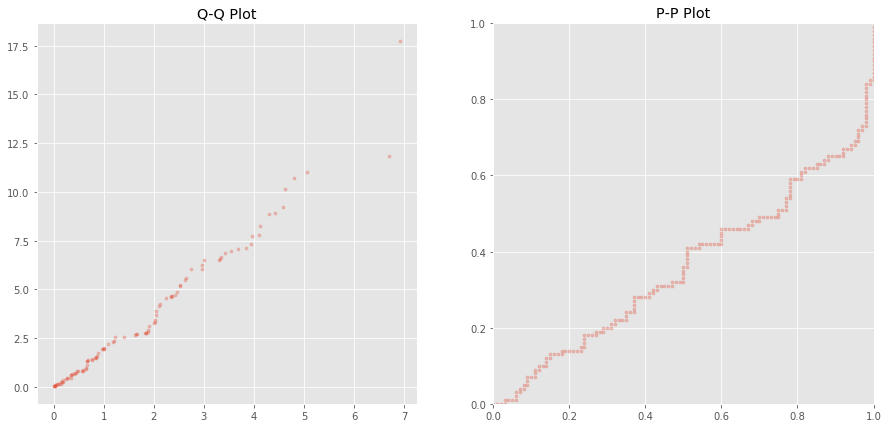

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
qqplot(ax[0], data1, data2)
ppplot(ax[1], data1, data2)


## Q-Q Plots that handle different-sized data sets

This is really ugly.

In [70]:
def qqplot(ax, data1, data2, s=10, alpha=0.3):
    data1 = np.sort(data1)
    data2 = np.sort(data2)
    q1 = np.linspace(0, 1, len(data1))
    q2 = np.linspace(0, 1, len(data2))
    q_combined = np.sort(np.concatenate([q1, q2]))[:, None]
    qi1 = (q1 < q_combined).sum(axis=1)
    qi2 = (q2 < q_combined).sum(axis=1)

    ax.scatter(data1[qi1], data2[qi2], s=s, alpha=alpha)
    ax.set_title('Q-Q Plot')

In [76]:
data1 = stats.expon(0, 2).rvs(1000)
data2 = stats.expon(0, 5).rvs(3000)

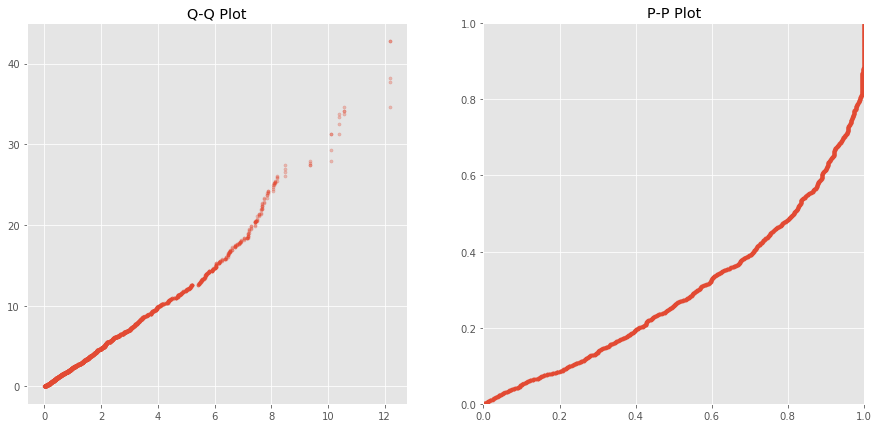

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
qqplot(ax[0], data1, data2)
ppplot(ax[1], data1, data2)

The simplest way to think of P-P and Q-Q plots is through the (empirical) cdfs.

In [227]:
def plot_empirical_cdf(ax, data, color=None, xlim=None, transpose=False):
    data = np.sort(data)
    quantiles = np.linspace(0, 1, len(data))
    if xlim is not None:
        if xlim[0] < np.min(data):
            data = np.concatenate([[xlim[0]], data])
            quantiles = np.concatenate([[0], quantiles])
        if xlim[1] > np.max(data):
            data = np.concatenate([data, [xlim[1]]])
            quantiles = np.concatenate([quantiles, [1]])
    
    if transpose:
        ax.plot(quantiles, data,  '.-', c=color)
        ax.set_xlabel('quantile')
        ax.set_ylabel('position')
        ax.set_title('PPF')
    else:
        ax.plot(data, quantiles, '.-', c=color)
        ax.set_ylabel('quantile')
        ax.set_xlabel('position')
        ax.set_title('CDF')


In [228]:
data1 = stats.norm(0,1).rvs(100)
data2 = stats.norm(1.5,1.9).rvs(100)

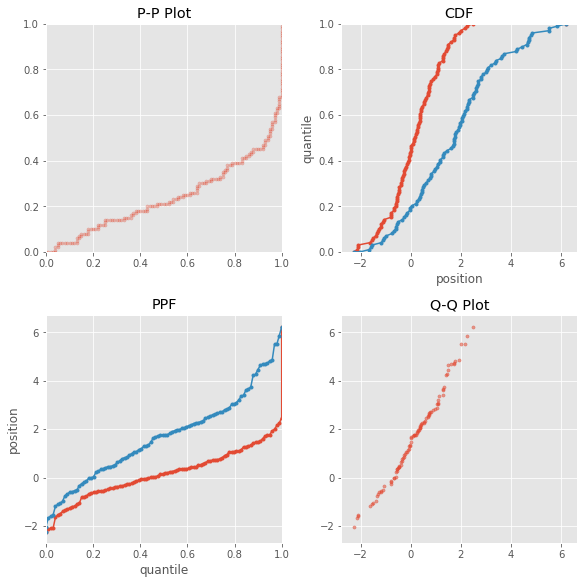

In [229]:
fig = plt.figure(figsize=(8, 8),constrained_layout=True)
gs = fig.add_gridspec(2, 2)
ax_cdf = fig.add_subplot(gs[0, 1])
ax_pp = fig.add_subplot(gs[0, 0], sharey=ax_cdf)
ax_qq = fig.add_subplot(gs[1, 1], sharex=ax_cdf)
ax_ppf = fig.add_subplot(gs[1, 0], sharex=ax_pp, sharey=ax_qq)

all_data = np.concatenate([data1, data2])
xlim = np.min(all_data), np.max(all_data)
plot_empirical_cdf(ax_cdf, data1, xlim=xlim)
plot_empirical_cdf(ax_cdf, data2, xlim=xlim)

plot_empirical_cdf(ax_ppf, data1, xlim=xlim, transpose=True)
plot_empirical_cdf(ax_ppf, data2, xlim=xlim, transpose=True)
qqplot(ax_qq, data1, data2)
ppplot(ax_pp, data1, data2)

The P-P plot is produced by scanning across position (the x axis) and plotting the quantile (y) of one graph against the other.

The Q-Q plot is produced by scanning across quantile (the y axis) and plotting the position (x) of one graph against the other.

Note that these can be done with distributions as well as samples, using a cdf rather than an empirical cdf.